# Importing Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("/home/pavankumar/data_sci_dec/datasets/titanic_train.csv",index_col='PassengerId')
# train = pd.read_csv("/home/pavankumar/data_sci_dec/datasets/tested.csv",index_col='PassengerId')

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train['Name'].is_unique

True

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
train.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [9]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train['Survived']

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

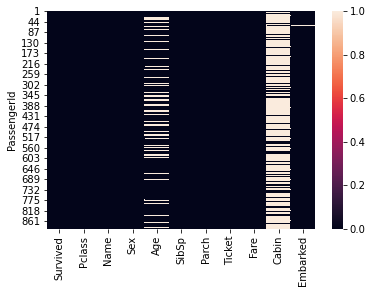

In [11]:
sns.heatmap(train.isnull())

In [12]:
#Cabin has 687 rows null out of 891

In [13]:
# Handeling missing Values

In [14]:
train.drop(axis=1,columns='Cabin',inplace=True)

In [15]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [16]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
train[~train['Embarked'].isin(['S','C','Q'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [18]:
# train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode(),inplace=True)

# train['Embarked']=train.replace(np.NaN,train['Embarked'].mode())  Testing needed

In [19]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [20]:
# train['Embarked']=train['Embarked'].dropna(axis=0,how='any')


In [21]:
train.dropna(subset=['Embarked'],axis=0,inplace=True)

In [22]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

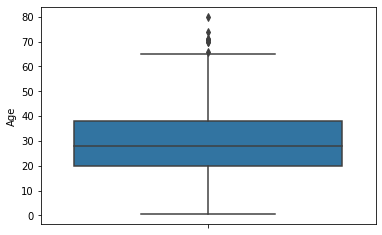

In [23]:
sns.boxplot('Age',data=train,orient='v')

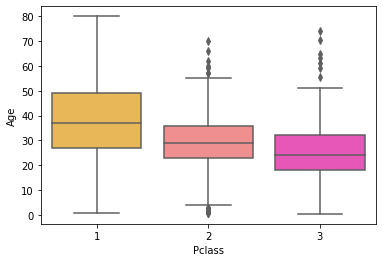

In [24]:
sns.boxplot(x=train['Pclass'],y=train['Age'],palette='spring_r')

In [25]:
train[train['Pclass']==1]['Age'].mean()

38.10554347826087

In [26]:
train[train['Pclass']==2]['Age'].mean()

29.87763005780347

In [27]:
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

In [28]:
def impute_age(col):
    age=col[0]
    pclass=col[1]
    if pd.isnull(age):
        if pclass==1:
            return 38.10
        elif pclass==2:
            return 29.87
        elif pclass==3:
            return 25.14
    else:
        return age

In [29]:
train['Age']=train[['Age','Pclass']].apply(impute_age, axis=1)

In [30]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [31]:
train['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

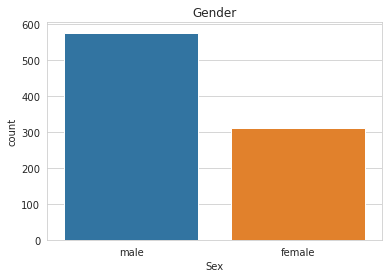

In [32]:
sns.set_style('whitegrid')
sns.countplot(train['Sex'])
plt.title("Gender")
plt.show()

In [33]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14,1,2,W./C. 6607,23.4500,S


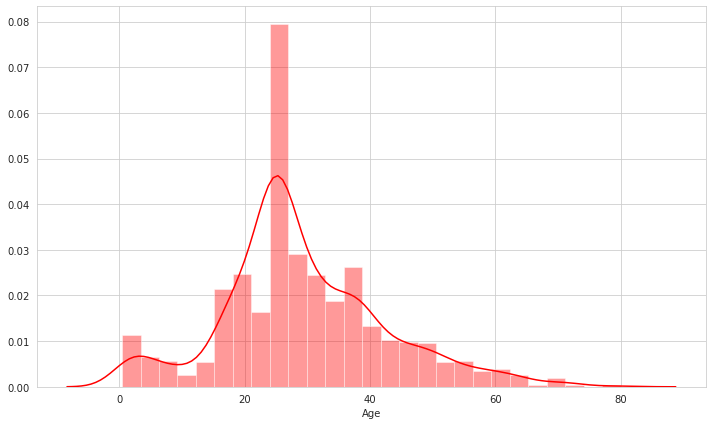

In [34]:
plt.figure(figsize=(12, 7))
sns.distplot(train['Age'],color='r')
plt.show()

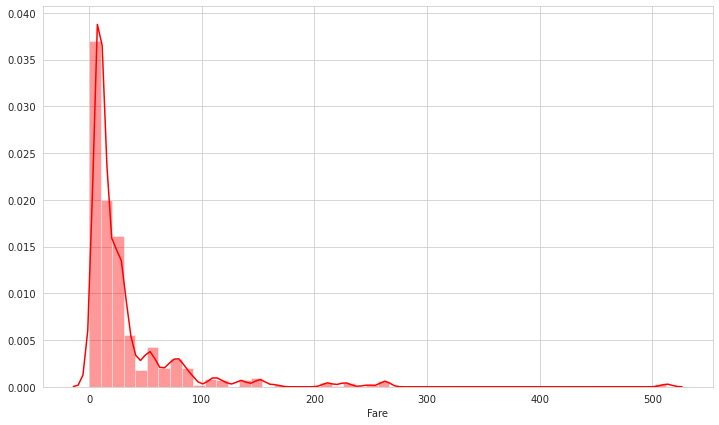

In [35]:
plt.figure(figsize=(12, 7))
sns.distplot(train['Fare'],color='r')
plt.show()

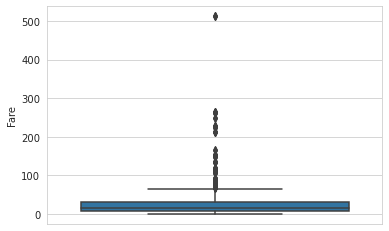

In [36]:
sns.boxplot('Fare',data=train,orient='v')

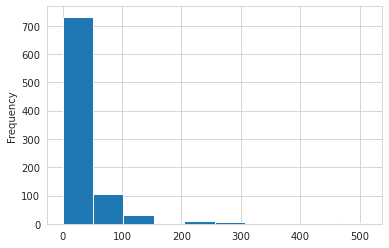

In [37]:
train['Fare'].plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40e5faa370>,
      dtype=object)

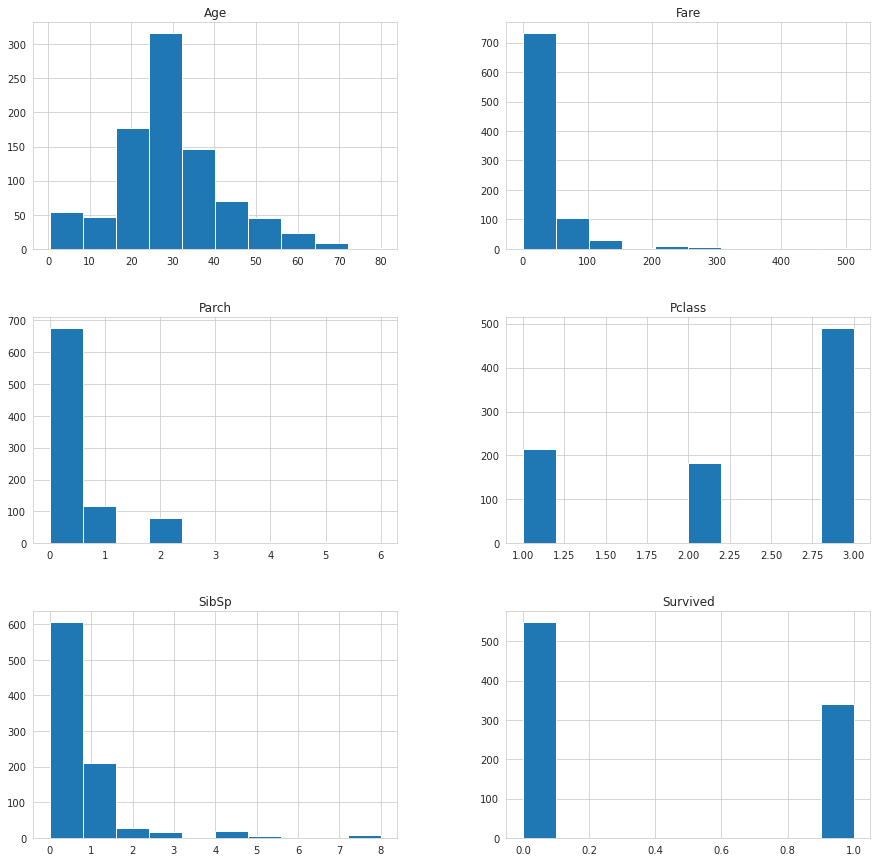

In [38]:
train.hist(figsize=(15,15))

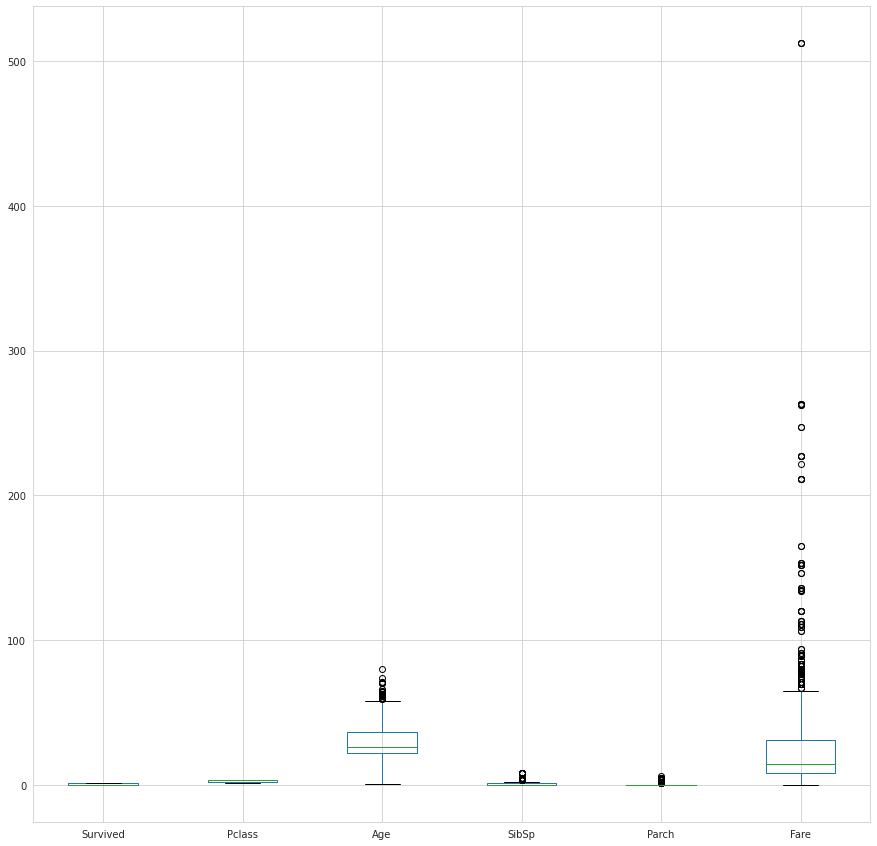

In [39]:
train.boxplot(figsize=(15,15))

In [40]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [41]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [42]:
le=LabelEncoder()
oe=OneHotEncoder()

In [43]:
train['Sex']=le.fit_transform(train['Sex'].values.reshape(-1,1))

/home/pavankumar/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [44]:
train['Embarked']

PassengerId
1      S
2      C
3      S
4      S
5      S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 889, dtype: object

In [45]:
train['Embarked']=le.fit_transform(train['Embarked'].values.reshape(-1,1))

In [46]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [47]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.055348,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.400477,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.085721,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.055348,-0.400477,0.085721,1.000000,-0.242690,-0.174706,0.117888,-0.018652
SibSp,-0.034040,0.081656,-0.116348,-0.242690,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.174706,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.117888,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.018652,0.068900,0.040449,-0.226311,1.000000


In [48]:
len(train['Ticket'].value_counts())

680

In [49]:
train.drop(['Name','Ticket'],axis=1,inplace=True)

In [50]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40e580e220>,
      dtype=object)

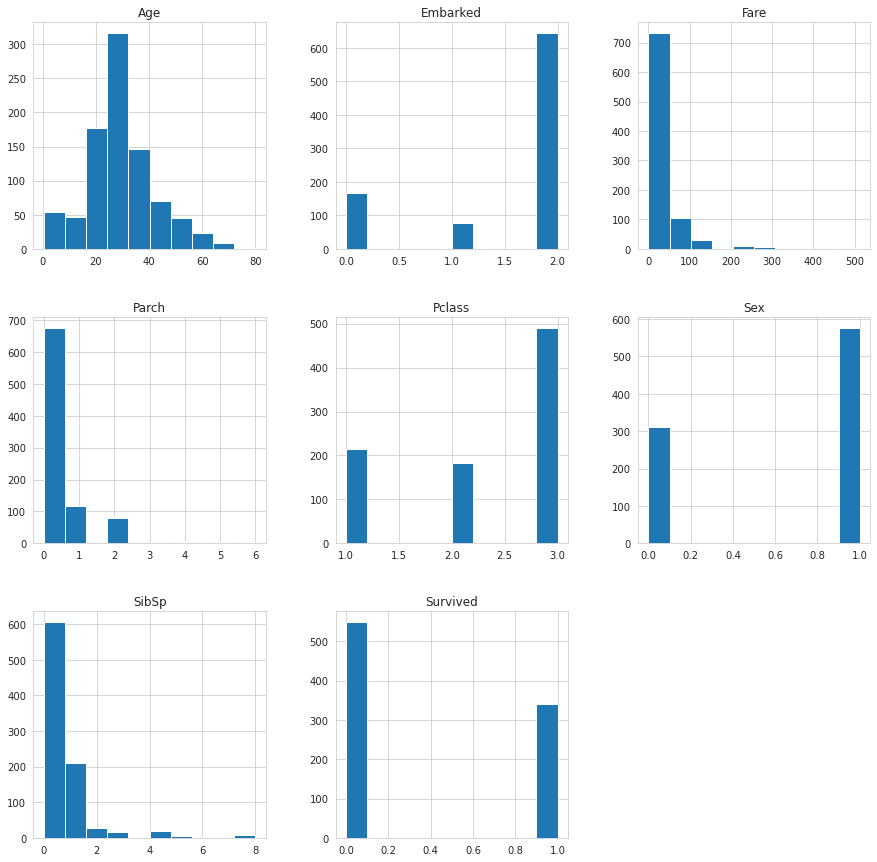

In [51]:
train.hist(figsize=(15,15))

In [52]:
train.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.508657
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked   -1.261367
dtype: float64

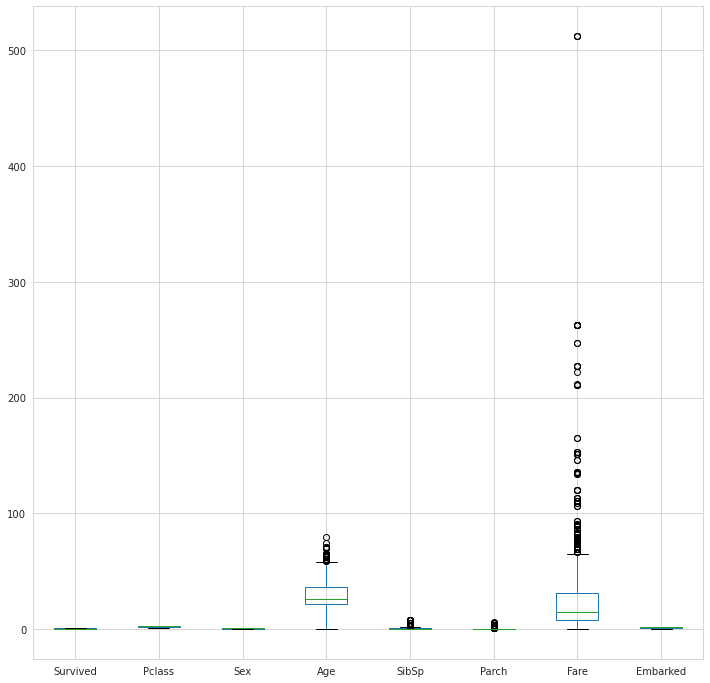

In [53]:
train.boxplot(figsize=(12,12))

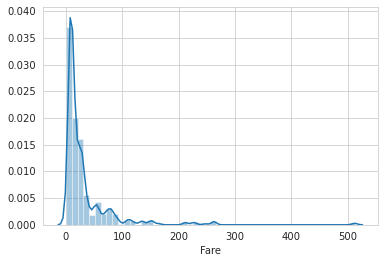

In [54]:
sns.distplot(train['Fare'])

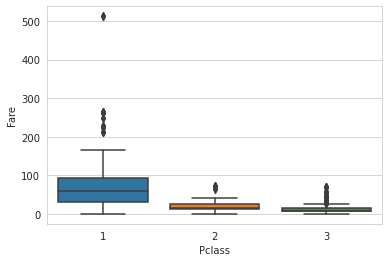

In [55]:
sns.boxplot(x='Pclass',y='Fare',data=train)

In [56]:
train[train['Pclass']==1]['Fare']

PassengerId
2      71.2833
4      53.1000
7      51.8625
12     26.5500
24     35.5000
        ...   
872    52.5542
873     5.0000
880    83.1583
888    30.0000
890    30.0000
Name: Fare, Length: 214, dtype: float64

In [57]:
from scipy.stats import zscore

In [58]:
a=train[train['Pclass']==1]['Fare']

In [59]:
# print(a==512.3292)
# a.empty, a.bool(), a.item(), a.any() or a.all()
# a.keys().name
# a.keys()
a.values

array([ 71.2833,  53.1   ,  51.8625,  26.55  ,  35.5   , 263.    ,
        27.7208, 146.5208,  82.1708,  52.    ,  76.7292,  61.9792,
        35.5   ,  83.475 ,  27.7208,  47.1   , 263.    ,  61.175 ,
        34.6542,  63.3583,  77.2875,  52.    , 247.5208,  77.2875,
        26.2833,  53.1   ,  79.2   ,  66.6   ,  61.3792,  55.    ,
        25.925 ,  33.5   ,  30.6958,  28.7125,  50.    ,  26.55  ,
        27.7208, 146.5208,  31.    , 113.275 ,  76.2917,  90.    ,
        83.475 ,  90.    ,  52.5542,  26.55  ,  79.2   ,  86.5   ,
       512.3292,  79.65  ,   0.    , 153.4625, 135.6333,  31.    ,
        29.7   ,  77.9583,  26.    ,  78.85  ,  91.0792,  27.7208,
       151.55  ,  30.5   , 247.5208, 151.55  , 110.8833, 108.9   ,
        56.9292,  83.1583, 262.375 , 164.8667, 134.5   , 135.6333,
        57.9792,  28.5   , 153.4625, 133.65  ,  66.6   , 134.5   ,
        35.5   , 263.    ,  35.    ,  55.    ,  75.25  ,  69.3   ,
        55.4417, 135.6333,  82.1708, 211.5   , 227.525 ,  52. 

In [61]:
z=np.abs(zscore(a))
threshold=3

In [62]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.00,1,0,7.2500,2
2,1,1,0,38.00,1,0,71.2833,0
3,1,3,0,26.00,0,0,7.9250,2
4,1,1,0,35.00,1,0,53.1000,2
5,0,3,1,35.00,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.00,0,0,13.0000,2
888,1,1,0,19.00,0,0,30.0000,2
889,0,3,0,25.14,1,2,23.4500,2


In [63]:
z=np.abs(zscore(train[['Fare','Age']]))
threshold=3
len(np.where(z>3)[0]) #27
new_train=train[(np.abs(zscore(train[['Fare','Age']])) < 3).all(axis=1)]
new_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.00,1,0,7.2500,2
2,1,1,0,38.00,1,0,71.2833,0
3,1,3,0,26.00,0,0,7.9250,2
4,1,1,0,35.00,1,0,53.1000,2
5,0,3,1,35.00,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.00,0,0,13.0000,2
888,1,1,0,19.00,0,0,30.0000,2
889,0,3,0,25.14,1,2,23.4500,2


In [64]:
new_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.00,1,0,7.2500,2
2,1,1,0,38.00,1,0,71.2833,0
3,1,3,0,26.00,0,0,7.9250,2
4,1,1,0,35.00,1,0,53.1000,2
5,0,3,1,35.00,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.00,0,0,13.0000,2
888,1,1,0,19.00,0,0,30.0000,2
889,0,3,0,25.14,1,2,23.4500,2


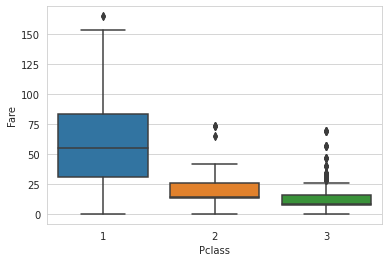

In [65]:
sns.boxplot(x='Pclass',y='Fare',data=new_train)

In [66]:
#Percentage of loss of Data in outliers


In [67]:
prcnt=(27/889)*100
prcnt ### prefer to be less than 5 %

3.0371203599550056

In [68]:
z=np.abs(zscore(train))
threshold=3
len(np.where(z>3)[0])

train_new1=train[(np.abs(zscore(train)) < 3).all(axis=1)]
len(np.where(z>3)[0])

72

In [69]:
(72/889)*100 ### it is not good practise

8.098987626546682

In [70]:
train.head(12)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.00,1,0,7.2500,2
2,1,1,0,38.00,1,0,71.2833,0
3,1,3,0,26.00,0,0,7.9250,2
4,1,1,0,35.00,1,0,53.1000,2
5,0,3,1,35.00,0,0,8.0500,2
6,0,3,1,25.14,0,0,8.4583,1
7,0,1,1,54.00,0,0,51.8625,2
8,0,3,1,2.00,3,1,21.0750,2
9,1,3,0,27.00,0,2,11.1333,2


In [71]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87,  95, 115, 117,
        118, 158, 163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277,
        298, 310, 323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 492,
        526, 540, 541, 556, 566, 609, 629, 637, 671, 677, 678, 682, 685,
        688, 699, 715, 729, 735, 736, 741, 744, 773, 778, 786, 791, 812,
        823, 844, 848, 849, 856, 861, 883]),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5]))

In [72]:
train['Fare'][48]

7.75

In [73]:
train.loc[48]

Survived     1.00
Pclass       3.00
Sex          0.00
Age         25.14
SibSp        0.00
Parch        0.00
Fare         7.75
Embarked     1.00
Name: 48, dtype: float64

In [74]:
train.iloc[48,6]

21.6792

In [75]:
train.iloc[48]

Survived     0.0000
Pclass       3.0000
Sex          1.0000
Age         25.1400
SibSp        2.0000
Parch        0.0000
Fare        21.6792
Embarked     0.0000
Name: 49, dtype: float64

In [76]:
train.iloc[47:50,:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
48,1,3,0,25.14,0,0,7.7500,1
49,0,3,1,25.14,2,0,21.6792,0
50,0,3,0,18.00,1,0,17.8000,2


In [77]:
train.loc[[47,48,161,162,177,178]]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
47,0,3,1,25.14,1,0,15.5000,1
48,1,3,0,25.14,0,0,7.7500,1
161,0,3,1,44.00,0,1,16.1000,2
162,1,2,0,40.00,0,0,15.7500,2
177,0,3,1,25.14,3,1,25.4667,2
178,0,1,0,50.00,0,0,28.7125,0


In [78]:
train[train['Fare']==512.3292]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
259,1,1,0,35.0,0,0,512.3292,0
680,1,1,1,36.0,0,1,512.3292,0
738,1,1,1,35.0,0,0,512.3292,0


In [79]:
# now work on new_train data set

In [80]:
new_train.shape

(862, 8)

In [81]:
new_train.skew() # range of skewness in -5 to +5

Survived    0.508351
Pclass     -0.715372
Sex        -0.639189
Age         0.332327
SibSp       3.747283
Parch       2.836258
Fare        2.279424
Embarked   -1.324871
dtype: float64

In [82]:
from scipy.stats import boxcox
# 0  ==> log transformation
# 0.5 ==> square root transformation

In [83]:
new_train['Fare'].skew()

2.2794241344407626

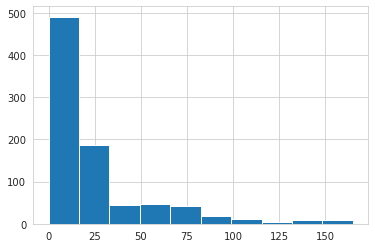

In [84]:
new_train['Fare'].hist()

In [85]:
new_train["Fare"].min()

0.0

In [86]:
new_train["Fare"].argmin()

173

In [87]:
# new_train['Fare']=np.log(new_train['Fare'])

new_train['Fare']=boxcox(new_train['Fare'])  ###  data must be positive starts from 1 not from 0

ValueError: Data must be positive.

In [88]:
new_train[new_train["Fare"]==0.0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
180,0,3,1,36.00,0,0,0.0,2
264,0,1,1,40.00,0,0,0.0,2
272,1,3,1,25.00,0,0,0.0,2
278,0,2,1,29.87,0,0,0.0,2
303,0,3,1,19.00,0,0,0.0,2
414,0,2,1,29.87,0,0,0.0,2
467,0,2,1,29.87,0,0,0.0,2
482,0,2,1,29.87,0,0,0.0,2
598,0,3,1,49.00,0,0,0.0,2


In [89]:
# Rather than normal boxcox, you can use boxcox1p. It adds 1 to x so there won't be any "0" record
from scipy.special import boxcox1p
boxcox1p(new_train['Fare'],0)

PassengerId
1      2.110213
2      4.280593
3      2.188856
4      3.990834
5      2.202765
         ...   
887    2.639057
888    3.433987
889    3.196630
890    3.433987
891    2.169054
Name: Fare, Length: 862, dtype: float64

In [90]:
boxcox1p(new_train['Fare'],0).min()

0.0

In [91]:
new_train['Fare']=boxcox1p(new_train['Fare'],0)

<ipython-input-91-e539941ef468>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['Fare']=boxcox1p(new_train['Fare'],0)


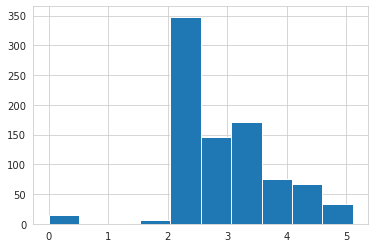

In [92]:
new_train['Fare'].hist()

In [93]:
new_train['Fare'].skew()

0.11516891463415425

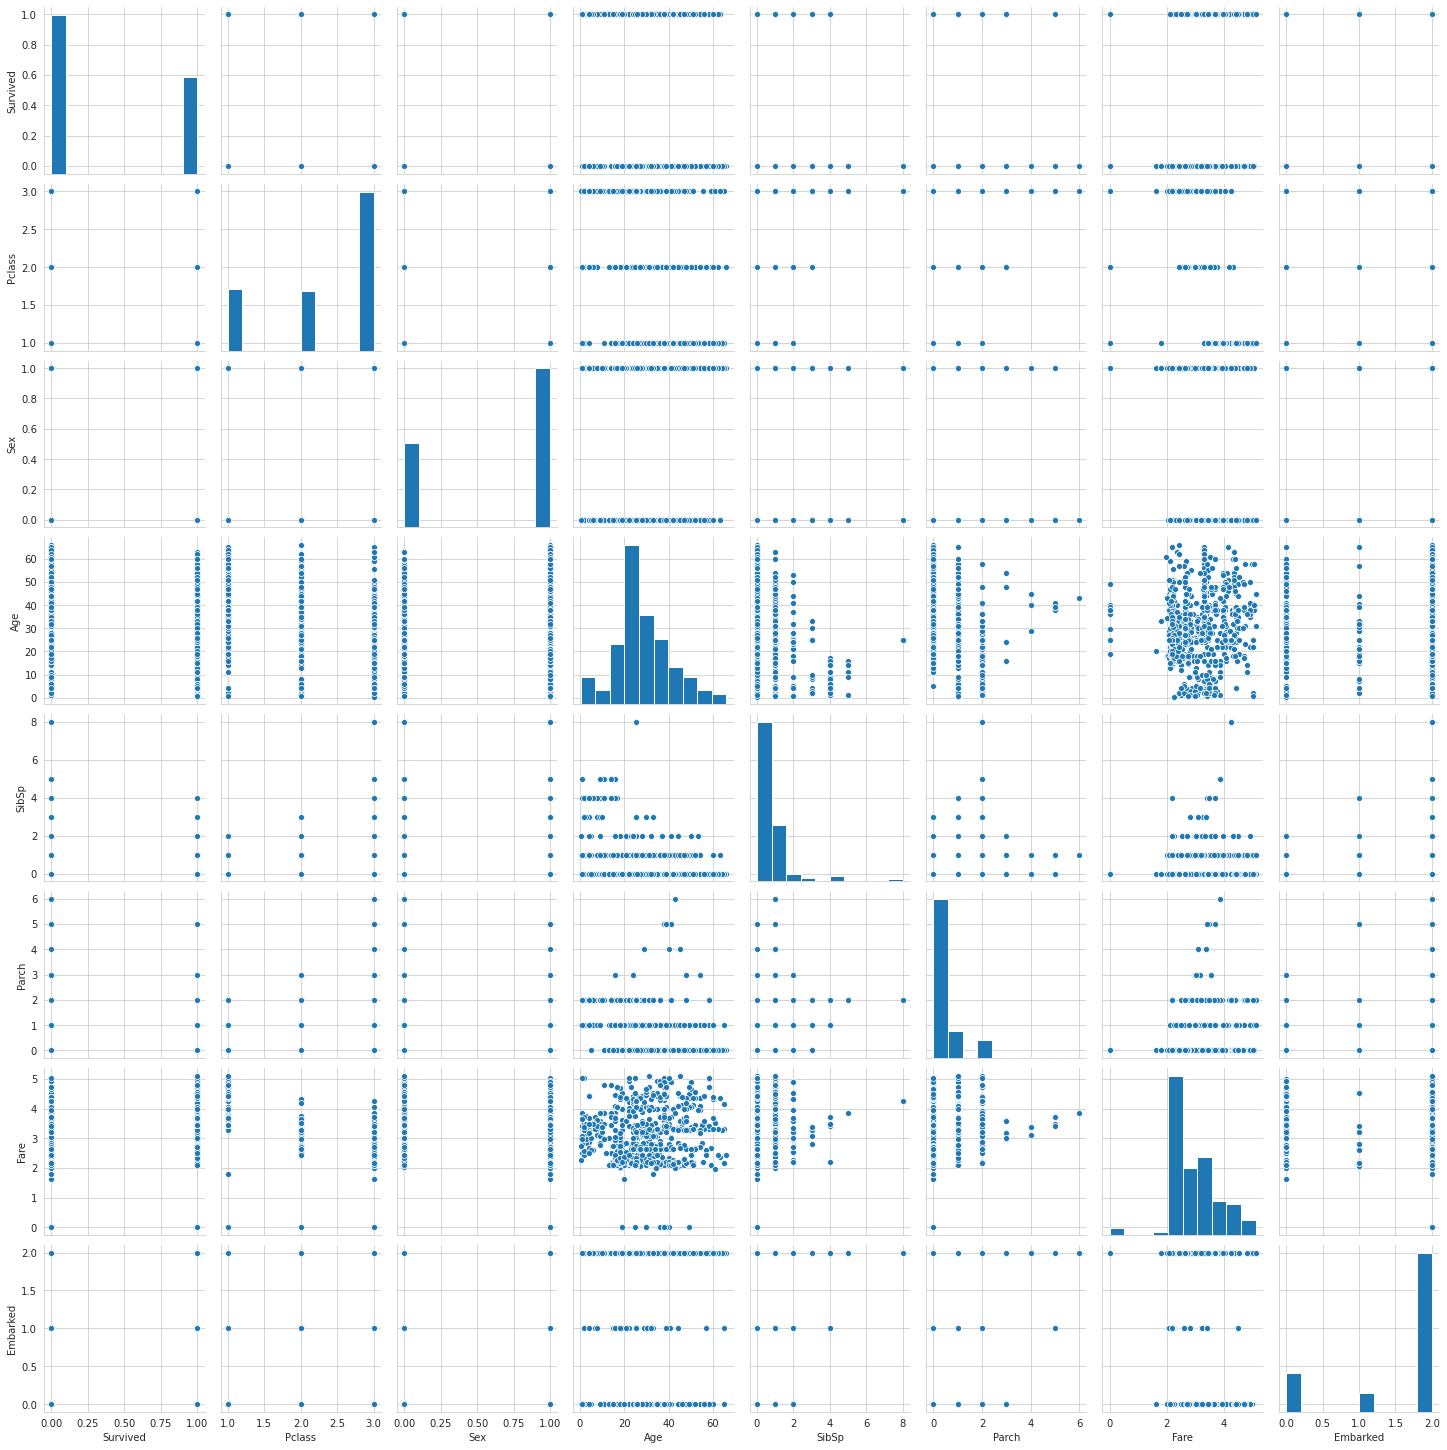

In [94]:
sns.pairplot(new_train)

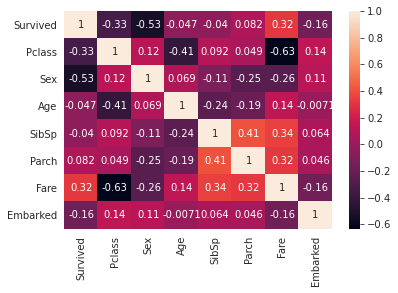

In [95]:
sns.heatmap(new_train.corr(),annot=True)

In [96]:
## difference in independent columns if it is less than 5% then we can drop one of those column
# here Age and sbsb has -0.007 differes less than 5% 
# dropping sbsp

In [97]:
# new_train.drop('SibSp', axis=1,inplace=True)

In [98]:
new_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.00,1,0,2.110213,2
2,1,1,0,38.00,1,0,4.280593,0
3,1,3,0,26.00,0,0,2.188856,2
4,1,1,0,35.00,1,0,3.990834,2
5,0,3,1,35.00,0,0,2.202765,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.00,0,0,2.639057,2
888,1,1,0,19.00,0,0,3.433987,2
889,0,3,0,25.14,1,2,3.196630,2


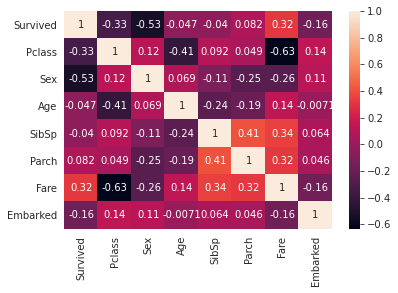

In [99]:
sns.heatmap(new_train.corr(),annot=True)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(new_train.drop('Survived',axis=1), 
                                                    new_train['Survived'], test_size=0.30, 
                                                    random_state=150)

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logmodel.score(X_train,y_train)

/home/pavankumar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8092868988391376

In [104]:
predictions = logmodel.predict(X_test)

In [105]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [106]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       160
           1       0.78      0.66      0.71        99

    accuracy                           0.80       259
   macro avg       0.79      0.77      0.78       259
weighted avg       0.80      0.80      0.80       259



In [107]:
confusion_matrix(y_test,predictions)

array([[142,  18],
       [ 34,  65]])

In [108]:
(142+65)/(142+18+34+65)

0.7992277992277992

In [109]:
accuracy_score(y_test,predictions)

0.7992277992277992

In [110]:
import warnings
warnings.simplefilter('ignore')

In [111]:
# for best random state
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(new_train.drop('Survived',axis=1), 
                                                    new_train['Survived'], test_size=0.30, 
                                                    random_state=i)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    if accuracy>accu:
        accu=accuracy
        best_state=i
print(f"Final accuracy is{accu} and best random state is {best_state}")

Final accuracy is0.8687258687258688 and best random state is 158


In [112]:
X_train, X_test, y_train, y_test = train_test_split(new_train.drop('Survived',axis=1), 
                                                    new_train['Survived'], test_size=0.30, 
                                                    random_state=158)

In [113]:
# Classifier Models

In [114]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [115]:
mod=GaussianNB()
mod.fit(X_train,y_train)
predictions = mod.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.8378378378378378
[[136  25]
 [ 17  81]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       161
           1       0.76      0.83      0.79        98

    accuracy                           0.84       259
   macro avg       0.83      0.84      0.83       259
weighted avg       0.84      0.84      0.84       259



In [116]:
mod=LogisticRegression()
mod.fit(X_train,y_train)
predictions = mod.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.8687258687258688
[[148  13]
 [ 21  77]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       161
           1       0.86      0.79      0.82        98

    accuracy                           0.87       259
   macro avg       0.87      0.85      0.86       259
weighted avg       0.87      0.87      0.87       259



In [117]:
def svc(a):
    mod=SVC(kernel=a)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    print(accuracy_score(y_test,predictions))
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))

In [118]:
svc("poly")

0.6602316602316602
[[160   1]
 [ 87  11]]
              precision    recall  f1-score   support

           0       0.65      0.99      0.78       161
           1       0.92      0.11      0.20        98

    accuracy                           0.66       259
   macro avg       0.78      0.55      0.49       259
weighted avg       0.75      0.66      0.56       259



In [119]:
svc('linear')

0.8262548262548263
[[145  16]
 [ 29  69]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       161
           1       0.81      0.70      0.75        98

    accuracy                           0.83       259
   macro avg       0.82      0.80      0.81       259
weighted avg       0.83      0.83      0.82       259



In [120]:
svc(('rbf'))

0.637065637065637
[[159   2]
 [ 92   6]]
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       161
           1       0.75      0.06      0.11        98

    accuracy                           0.64       259
   macro avg       0.69      0.52      0.44       259
weighted avg       0.68      0.64      0.52       259



In [121]:
def tree(a):    
    mod=DecisionTreeClassifier(a)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    print(accuracy_score(y_test,predictions))
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))

In [122]:
tree('gini')

0.7876447876447876
[[131  30]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       161
           1       0.71      0.74      0.73        98

    accuracy                           0.79       259
   macro avg       0.77      0.78      0.78       259
weighted avg       0.79      0.79      0.79       259



In [123]:
tree('entropy')

0.7722007722007722
[[126  35]
 [ 24  74]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       161
           1       0.68      0.76      0.71        98

    accuracy                           0.77       259
   macro avg       0.76      0.77      0.76       259
weighted avg       0.78      0.77      0.77       259



In [124]:
def rndtree(a,b):
    accu=0
    best_n=0
    for i in a:
        mod=RandomForestClassifier(n_estimators=i,random_state=b)
        mod.fit(X_train,y_train)
        predictions = mod.predict(X_test)
        accuracy=accuracy_score(y_test,predictions)
        if accuracy>accu:
            accu=accuracy
            best_n=i
    mod=RandomForestClassifier(n_estimators=best_n,random_state=b)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    print(accuracy_score(y_test,predictions))
    print(confusion_matrix(y_test,predictions))
    print(classification_report(y_test,predictions))
    print("best n is ", best_n)
    print()

In [125]:
rndtree(list(np.arange(100,200)),150)

0.8301158301158301
[[143  18]
 [ 26  72]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       161
           1       0.80      0.73      0.77        98

    accuracy                           0.83       259
   macro avg       0.82      0.81      0.82       259
weighted avg       0.83      0.83      0.83       259

best n is  111



In [126]:
mod=KNeighborsClassifier()
mod.fit(X_train,y_train)
predictions = mod.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.7760617760617761
[[142  19]
 [ 39  59]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       161
           1       0.76      0.60      0.67        98

    accuracy                           0.78       259
   macro avg       0.77      0.74      0.75       259
weighted avg       0.77      0.78      0.77       259



In [127]:
# concluding best model is Logistic regression with 87%

# Hyper Tunning

In [128]:
parameters={'max_iter':[500,700,900,1100,1300,1500,1700],
           'alpha':[0.0001,0.001,0.01,0.1,1,10,100],
           'penalty':['elsticnet','l1','l2']}

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
from sklearn.pipeline import Pipeline

In [135]:
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}
]

In [143]:
gcv=GridSearchCV(LogisticRegression(),param_grid={'random_state': [30,200]},cv=8)
gcv.fit(X_train,y_train)
pred=gcv.best_estimator_.predict(X_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8687258687258688
[[148  13]
 [ 21  77]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       161
           1       0.86      0.79      0.82        98

    accuracy                           0.87       259
   macro avg       0.87      0.85      0.86       259
weighted avg       0.87      0.87      0.87       259



In [ ]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)